In [21]:
import pandas as pd 
import numpy as np 

import psycopg2 as pg2
import sqlalchemy
import s3fs

import julian
import datetime
import calendar
import time

import gdal
import os
import csv

import matplotlib.pyplot as plt
import matplotlib as mpl
#%matplotlib inline

import src.humble_beginnings as helper

In [22]:
lat_long_list = helper.get_meta_data()

In [23]:
station_id = list( x[0] for x in lat_long_list )
lat= list( x[1] for x in lat_long_list )
long= list( x[2] for x in lat_long_list )

In [24]:
meta_data, idi= load_metadata()

In [46]:
def make_jpg_files(idi,start=2000, end=2001):
    path_to_folder = 'pics/'
    
    for year in range(2000,2017):
        table_name= 'w_' + str(year)[-2:]
        print(f"Fetching from table {table_name}")
        
        first_day = datetime.date(year=year, day=1, month=1)
        last_day = datetime.date(year=year, day=31, month=12)
        
        rng = pd.date_range(end=last_day, start=first_day, freq='D')
        
        for day in rng:
            start = time.time()
            query_day=str(day.date())
            df = helper.get_weather_for_one_day(table_name, query_day)
            
            
            lat, long, var, precip = make_plot_lists(idi,df)
            
            path= path_to_folder + query_day + '.jpg'
            plot_tool(lat,long,var,precip, path, query_day)
            print(f'Fetched Weather Data for {query_day} in {time.time()-start:.2f} seconds!')
            
        return 'You Finished!'

Fetching from table w_00
Fetched Weather Data for 2000-01-01 in 7.92 seconds!


'You Finished!'

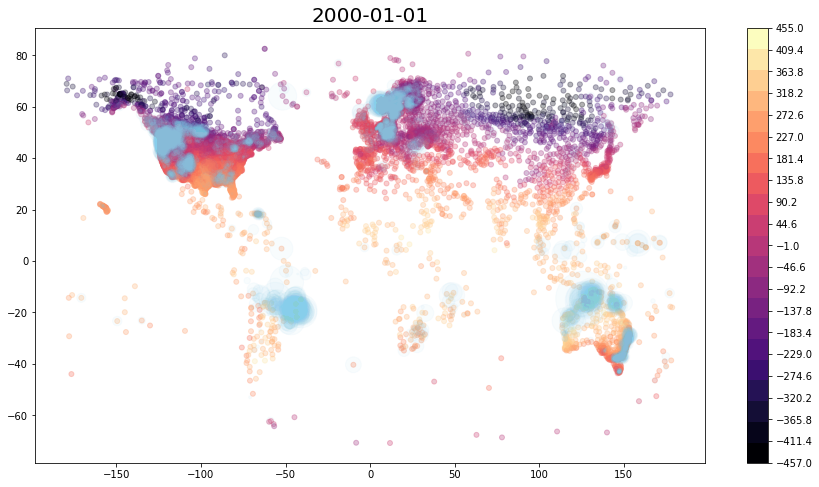

In [47]:
make_jpg_files(idi)

In [27]:
def make_plot_lists(idi,df):
    variables= []
    latitudes = []
    longitudes = []
    precips = []
    for station_index in range(0,len(df)):
        station_id, high_temp, precip = df.index[station_index][0], df.TMAX[station_index], df.PRCP[station_index]
        
        latitude = idi[station_id][0]
        longitude = idi[station_id][1]
        
        latitudes.append(latitude)
        longitudes.append(longitude)
        variables.append(high_temp)
        precips.append(precip)
        
    return latitudes, longitudes, variables, precips
    
    

In [28]:
df= helper.get_weather_for_one_day()

TypeError: get_weather_for_one_day() missing 2 required positional arguments: 'table_name' and 'day'

In [ ]:
lat, long, var, precip = make_plot_lists(idi,df)

In [ ]:
idi['AEM00041194']

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
max(var)

In [ ]:
min(var)

In [45]:
#cmap, norm = mpl.colors.from_levels_and_colors([0, 2, 5, 6], ['red', 'green', 'blue'])
def plot_tool(lat,long,var,precip,path,day):
    fig, ax = plt.subplots(figsize=(15,8))
    cmap = plt.get_cmap('magma',21)
    norm = mpl.colors.Normalize(vmin=-457,vmax=455)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ticks=np.linspace(-457,455,21)), 

    ax.scatter(long,lat, alpha=0.3, c=var, cmap=cmap,s=25,norm=norm)
    ax.scatter(long,lat, s=precip, alpha=.05, color='skyblue')
    #ax.set_ylim(20,60)
    #ax.set_xlim(-140,-50)
    ax.set_title(day, fontsize=20)
    
    fig.savefig(path)
    
    return None

In [ ]:
fig, ax = plt.subplots()
ax.scatter(long,lat, s=precip)

In [1]:
import imageio

In [19]:
def make_gif(path):
    files = sorted(os.listdir(path))
    images = []
    for file in files:
        start= time.time()
        images.append(imageio.imread(path+file))
        print(f'Appended {file} in {time.time()-start} seconds!')
    imageio.mimsave('test.gif', images,duration=.2)
    
    return None
        
        


In [20]:
make_gif('pics/')

Appended 2000-01-01.jpg in 0.022864818572998047 seconds!
Appended 2000-01-02.jpg in 0.015630006790161133 seconds!
Appended 2000-01-03.jpg in 0.017626285552978516 seconds!
Appended 2000-01-04.jpg in 0.014040946960449219 seconds!
Appended 2000-01-05.jpg in 0.014127016067504883 seconds!
Appended 2000-01-06.jpg in 0.01328897476196289 seconds!
Appended 2000-01-07.jpg in 0.01778888702392578 seconds!
Appended 2000-01-08.jpg in 0.013071060180664062 seconds!
Appended 2000-01-09.jpg in 0.014163017272949219 seconds!
Appended 2000-01-10.jpg in 0.013244867324829102 seconds!
Appended 2000-01-11.jpg in 0.014265060424804688 seconds!
Appended 2000-01-12.jpg in 0.016214847564697266 seconds!
Appended 2000-01-13.jpg in 0.013247013092041016 seconds!
Appended 2000-01-14.jpg in 0.013410091400146484 seconds!
Appended 2000-01-15.jpg in 0.01765608787536621 seconds!
Appended 2000-01-16.jpg in 0.022211790084838867 seconds!
Appended 2000-01-17.jpg in 0.02099299430847168 seconds!
Appended 2000-01-18.jpg in 0.021573

Appended 2000-05-27.jpg in 0.016708850860595703 seconds!
Appended 2000-05-28.jpg in 0.02154088020324707 seconds!
Appended 2000-05-29.jpg in 0.016620159149169922 seconds!
Appended 2000-05-30.jpg in 0.022459983825683594 seconds!
Appended 2000-05-31.jpg in 0.01537013053894043 seconds!
Appended 2000-06-01.jpg in 0.014282941818237305 seconds!
Appended 2000-06-02.jpg in 0.013446807861328125 seconds!
Appended 2000-06-03.jpg in 0.014868021011352539 seconds!
Appended 2000-06-04.jpg in 0.013293027877807617 seconds!
Appended 2000-06-05.jpg in 0.013899803161621094 seconds!
Appended 2000-06-06.jpg in 0.013877153396606445 seconds!
Appended 2000-06-07.jpg in 0.013733148574829102 seconds!
Appended 2000-06-08.jpg in 0.014636993408203125 seconds!
Appended 2000-06-09.jpg in 0.017117977142333984 seconds!
Appended 2000-06-10.jpg in 0.023696184158325195 seconds!
Appended 2000-06-11.jpg in 0.015715837478637695 seconds!
Appended 2000-06-12.jpg in 0.018107891082763672 seconds!
Appended 2000-06-13.jpg in 0.0197

In [ ]:

for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images, duration=.2)